# Customer Segmentation Using K-Means Clustering

# Importing Libraries

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Importing Dataset

In [169]:

df=pd.read_csv("Mall_Customers.csv")

In [170]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Shape of Dataset

In [171]:
df.shape

(200, 5)

# Datatypes of Attributes

In [172]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# Statistical Summary

In [173]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


# Finding Null Values

In [174]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Finding Duplicate Values

In [175]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [176]:
df['Annual Income (k$)'].max()

137

In [177]:
df['Annual Income (k$)'].min()

15

In [178]:
df.drop_duplicates(inplace=True)
df.shape

(200, 5)

In [179]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Changing Column Names

In [180]:
df.columns=['CustomerID','Gender','Age','Income','Spending_Score']

In [181]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'Spending_Score'], dtype='object')

# Plotting Scatter Plot (Income v/s Spending Score)

Text(0, 0.5, 'Spending Score')

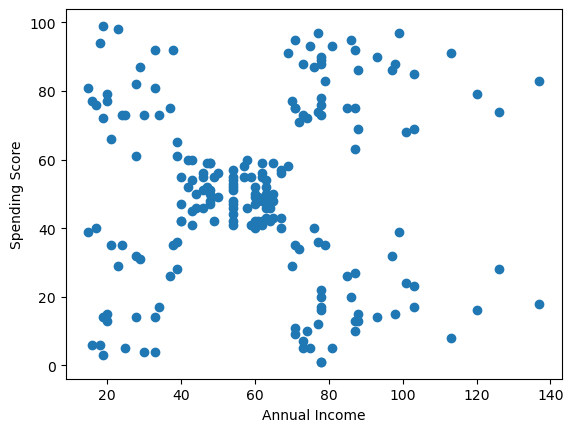

In [182]:
plt.scatter(df['Income'],df['Spending_Score'])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

In [183]:
# from sklearn.preprocessing import MinMaxScaler
# scaler1=MinMaxScaler()
# scaler2=MinMaxScaler()
# scaler1.fit(df[['Income']])
# df['Income']=scaler1.transform(df[['Income']])
# with open('scaler.pkl', 'wb') as f:
#     pickle.dump(scaler1, f)

In [184]:
# scaler2.fit(df[['Spending_Score']])
# df['Spending_Score']=scaler2.transform(df[['Spending_Score']])
# with open('scaler2.pkl', 'wb') as f:
#     pickle.dump(scaler2, f)

In [185]:
# df

C:\Users\manas\AppData\Local\Temp\ipykernel_8992\1426022472.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'])


<Axes: xlabel='Income', ylabel='Density'>

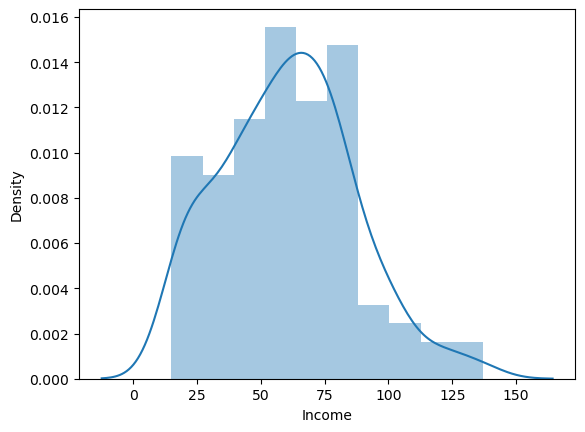

In [186]:
sns.distplot(df['Income'])

C:\Users\manas\AppData\Local\Temp\ipykernel_8992\1169363823.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending_Score'])


<Axes: xlabel='Spending_Score', ylabel='Density'>

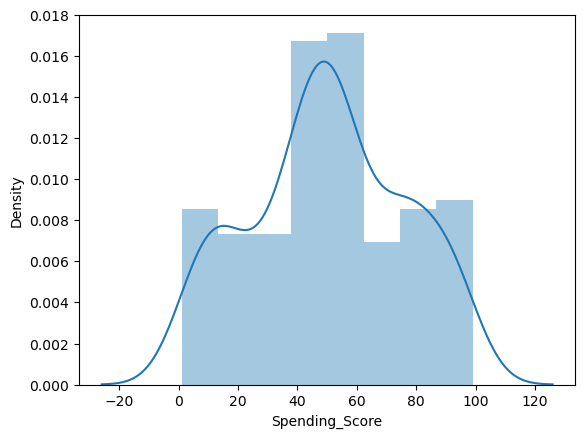

In [187]:
sns.distplot(df['Spending_Score'])

C:\Users\manas\AppData\Local\Temp\ipykernel_8992\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

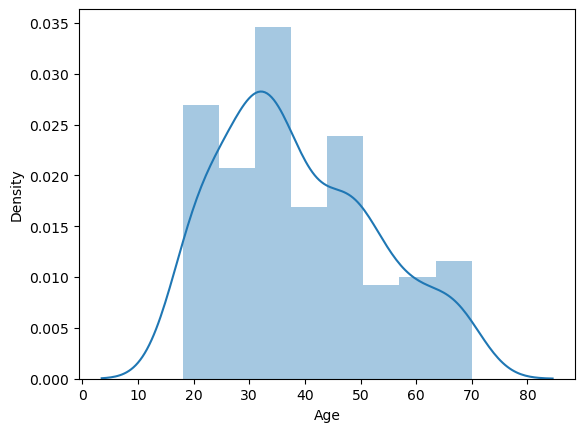

In [188]:
sns.distplot(df['Age'])

[]

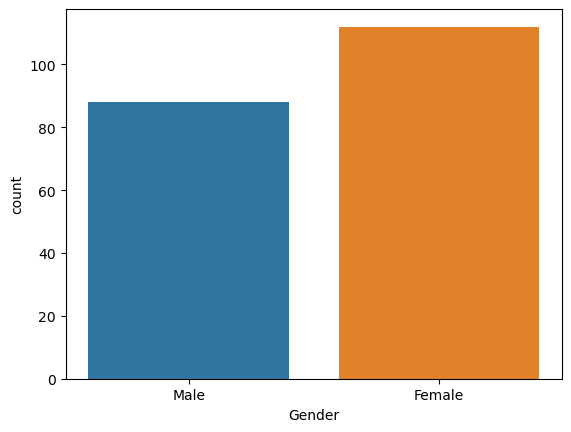

In [189]:
sns.countplot(data=df,x='Gender')

plt.yticks(np.arange(0,140,step=20))
plt.plot()

# Correlation

In [190]:
correlation=df.corr()
correlation

C:\Users\manas\AppData\Local\Temp\ipykernel_8992\3471529324.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


,CustomerID,Age,Income,Spending_Score
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Income,0.977548,-0.012398,1.000000,0.009903
Spending_Score,0.013835,-0.327227,0.009903,1.000000


C:\Users\manas\AppData\Local\Temp\ipykernel_8992\1202620626.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="crest")


<Axes: >

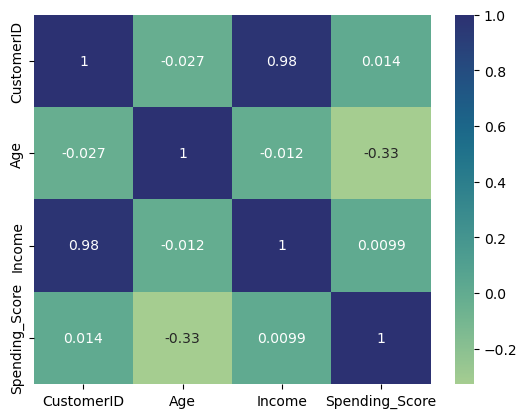

In [191]:
sns.heatmap(df.corr(),annot=True,cmap="crest")

# Scatter Plot (Age v/s Spending Score)

Text(0, 0.5, 'Spending Score')

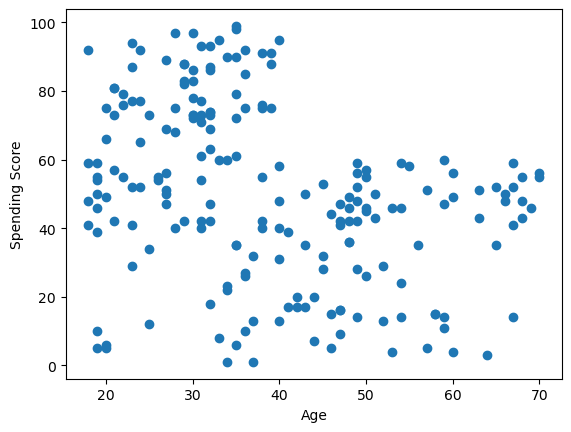

In [192]:
plt.scatter(df['Age'],df['Spending_Score'])
plt.xlabel('Age')
plt.ylabel('Spending Score')

Text(0, 0.5, 'Income')

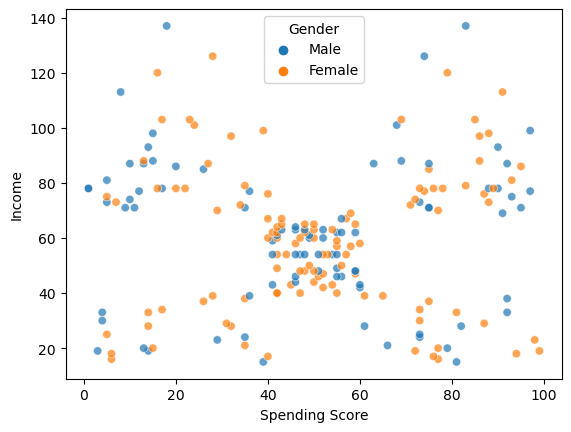

In [193]:
sns.scatterplot(x=df['Spending_Score'],y=df['Income'],hue=df['Gender'],alpha=0.7)
plt.xlabel('Spending Score')
plt.ylabel('Income')

In [194]:
# df_encoded= pd.get_dummies(df,columns=['Gender'])

In [195]:
# df_encoded

In [196]:
X1=df[['Income','Spending_Score']]
X1

,Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# Finding Optimal Number of Clusters using WCSS

In [197]:
wcss=[]
for i in range(1,11):
    k_means=KMeans(init="k-means++",n_clusters=i)
    k_means.fit(X1)
    wcss.append(k_means.inertia_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [198]:
wcss

[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37233.81451071001,
 30241.343617936585,
 25044.967764018926,
 21932.39204424098,
 19649.596582866965]

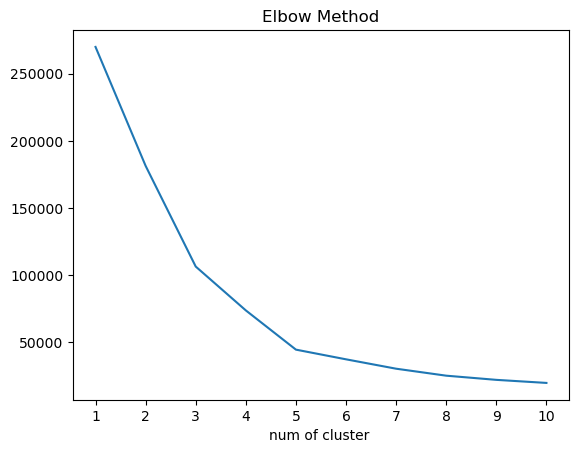

In [199]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("num of cluster ")
plt.xticks(range(1,11))
plt.show()

In [200]:
k_means=KMeans(n_clusters=5,random_state=42)
y_means=k_means.fit_predict(X1)
df['Cluster'] = k_means.fit_predict(X1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [201]:
df

,CustomerID,Gender,Age,Income,Spending_Score,Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


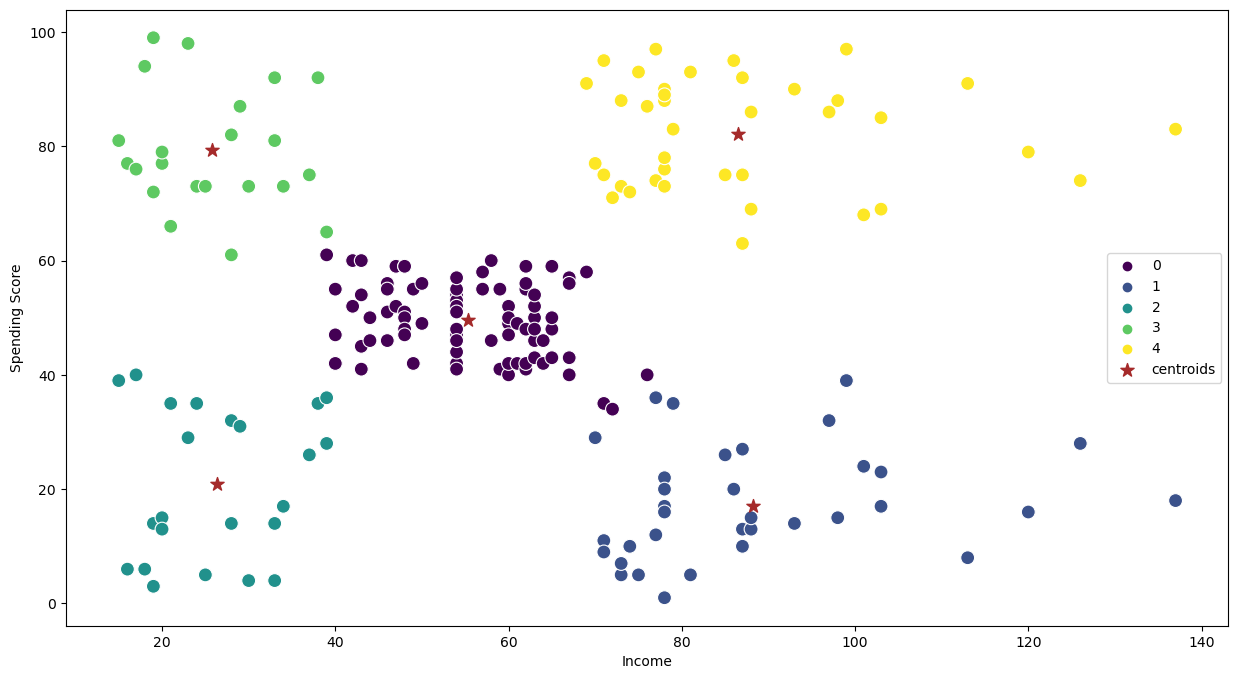

In [202]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=X1['Income'], y=X1['Spending_Score'], hue=df['Cluster'], palette='viridis', s=100)
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c="brown",marker='*',label="centroids")
plt.xlabel('Income')
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [203]:
cluster_label = k_means.predict(X1)

# Display cluster assignment to the user
print("Cluster assignment for the input data point:", cluster_label)

Cluster assignment for the input data point: [2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


# Saving Model

In [204]:
with open('kmeans.pkl', 'wb') as f:
    pickle.dump(k_means, f)

# GUI

In [205]:

income = int(input("Enter Income (K$) :"))
sscore = int(input("Enter Spending Score (1-100):"))
X=pd.DataFrame([[income,sscore]],columns=['Income','Spending_Score'])


cluster_label = k_means.predict(X)
customer_class=cluster_label[0]
print("Cluster assignment for the input data point:", cluster_label)

def cust_class():
    if customer_class==0:
        print("Customer with Medium Income & Medium Spending Score")
    elif customer_class==1 :
        print("Customer with High Income & Low Spending Score")
    elif customer_class==2:
        print("Customer with Low Income & Low Spending Score")
    elif customer_class==3:
        print("Customer with Low Income & High Spending Score")
    elif customer_class ==4:
        print("Customer with High Income & High Spending Score")
        
cust_class()     

Enter Income (K$) :120
Enter Spending Score (1-100):55
Cluster assignment for the input data point: [4]
Customer with High Income & High Spending Score


In [206]:
with open('kmeans.pkl', 'rb') as f:
    kmeans_model = pickle.load(f)

In [207]:
income = int(input("Enter Income (K$) :"))
sscore = int(input("Enter Spending Score (1-100):"))
X=pd.DataFrame([[income,sscore]],columns=['Income','Spending_Score'])


cluster_label = kmeans_model.predict(X)
customer_class=cluster_label[0]
print("Cluster assignment for the input data point:", cluster_label)

def cust_class():
    if customer_class==0:
        print("Customer with Medium Income & Medium Spending Score")
    elif customer_class==1 :
        print("Customer with High Income & Low Spending Score")
    elif customer_class==2:
        print("Customer with Low Income & Low Spending Score")
    elif customer_class==3:
        print("Customer with Low Income & High Spending Score")
    elif customer_class ==4:
        print("Customer with High Income & High Spending Score")
        
cust_class()     

Enter Income (K$) :95
Enter Spending Score (1-100):14
Cluster assignment for the input data point: [1]
Customer with High Income & Low Spending Score
